In [ ]:

import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/Colab_Notebooks')

ds_train = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/Colab_Notebooks',validation_split=0.2,subset="training",seed=123)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/Colab_Notebooks',validation_split=0.2,subset="validation",seed=123)


Found 2934 files belonging to 5 classes.
Found 2934 files belonging to 5 classes.
Using 2348 files for training.
Found 2934 files belonging to 5 classes.
Using 586 files for validation.


In [ ]:
import tensorflow_datasets as tfds
batch_size = 64
dataset_name = dataset
class_name = dataset.class_names
print(class_name)

['saved_model', 'saved_model_architecture', 'test', 'train', 'valid']


In [ ]:
size = (512,512)
ds_train = ds_train.map(lambda image,label: (tf.image.resize(image, size), label))
ds_val = ds_validation.map(lambda image,label: (tf.image.resize(image, size), label))

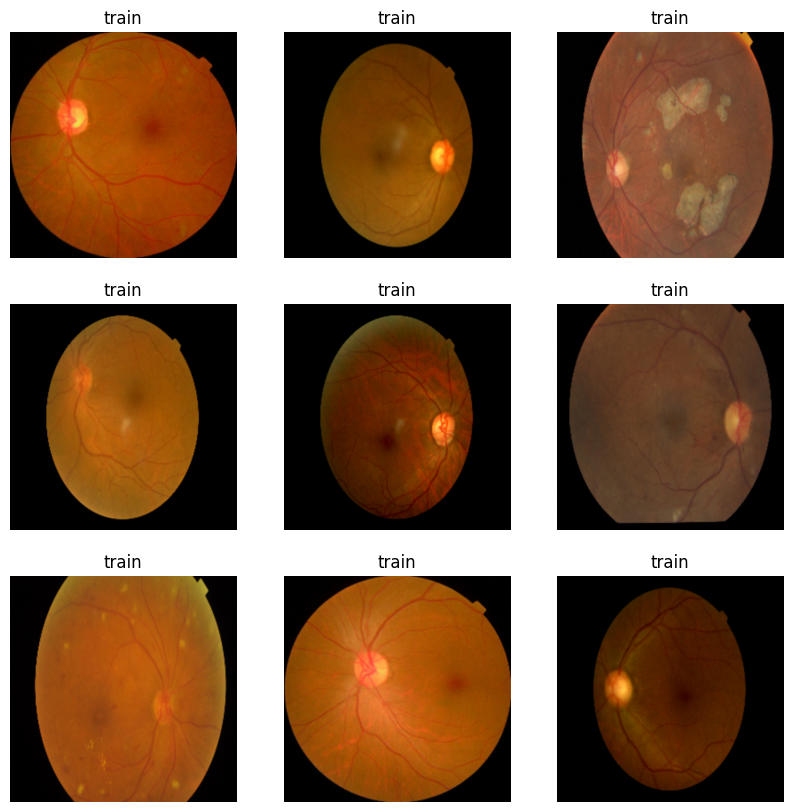

In [ ]:
"""import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")"""

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

image=Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(height_factor=(-0.2,-0.3),width_factor=(-0.2,-0.3),interpolation='bilinear'),
        layers.RandomContrast(factor=0.1),
        layers.RandomTranslation(height_factor=0.1,width_factor=0.1),
    ],
    name="image",
)

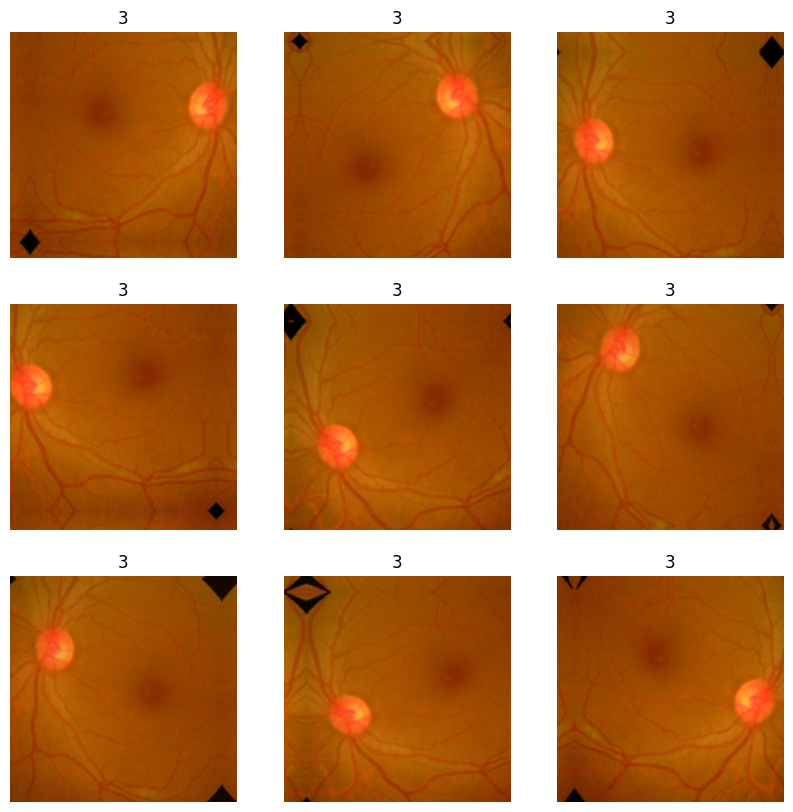

In [ ]:
import numpy as np
for images,labels in ds_train.take(1):
  plt.figure(figsize=(10,10))
  first_image=images[0]
  def f(x):
    return int(x)
  f2=np.vectorize(f)
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    augmented_image=image(
        tf.expand_dims(first_image,0),training=True
    )
    plt.imshow(augmented_image[0].numpy().astype("int32"))
    plt.title(f2(labels[0]))
    plt.axis("off")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

dataset_path = '/content/gdrive/MyDrive/Colab_Notebooks'

# Load the training dataset and resize images
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(512, 512),  # Resize images to match the expected input shape
    batch_size=32
)

# Load the validation dataset and resize images
ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(512, 512),  # Resize images to match the expected input shape
    batch_size=32
)

# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(ds_train.class_names), activation='softmax')  # Output layer with number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(ds_train, validation_data=ds_val, epochs=5)  # Adjust the number of epochs as needed



Found 2934 files belonging to 5 classes.
Using 2348 files for training.
Found 2934 files belonging to 5 classes.
Using 586 files for validation.
Epoch 1/5
74/74 [==============================] - 1951s 26s/step - loss: 36.4377 - accuracy: 0.7287 - val_loss: 0.6989 - val_accuracy: 0.7696
Epoch 2/5
74/74 [==============================] - 1852s 25s/step - loss: 0.6695 - accuracy: 0.7721 - val_loss: 0.7064 - val_accuracy: 0.7713
Epoch 3/5
74/74 [==============================] - 1853s 25s/step - loss: 0.6399 - accuracy: 0.7730 - val_loss: 0.6919 - val_accuracy: 0.7730
Epoch 4/5
74/74 [==============================] - 1855s 25s/step - loss: 0.6290 - accuracy: 0.7764 - val_loss: 0.7239 - val_accuracy: 0.7730
Epoch 5/5
74/74 [==============================] - 1831s 24s/step - loss: 0.6251 - accuracy: 0.7721 - val_loss: 0.7042 - val_accuracy: 0.7389


Found 2934 files belonging to 5 classes.
Using 586 files for validation.
19/19 [==============================] - 88s 4s/step


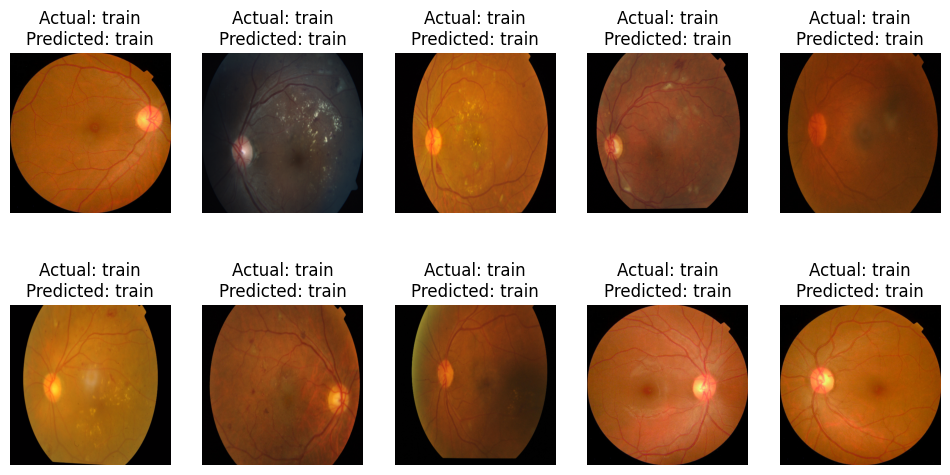

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

dataset_path = '/content/gdrive/MyDrive/Colab_Notebooks'

# Load the test dataset and resize images
ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(512, 512),  # Resize images to match the expected input shape
    batch_size=32
)

# Assuming your model is already defined and trained
# (you should have a trained model from the previous code)

# Make predictions on the test dataset
predictions = model.predict(ds_test)

# Get the actual labels from the test dataset
actual_labels = np.concatenate([y for x, y in ds_test], axis=0)

# Convert the predicted probabilities to predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Display some examples of predictions and actual labels
plt.figure(figsize=(12, 6))

# Use take to create a new dataset with a specified number of batches
for i, (images, labels) in enumerate(ds_test.take(10)):  # Adjust the number of examples to display as needed
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Actual: {ds_test.class_names[labels[0]]}\nPredicted: {ds_test.class_names[predicted_labels[i]]}")
    plt.axis("off")

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # Add this line
import tensorflow as tf



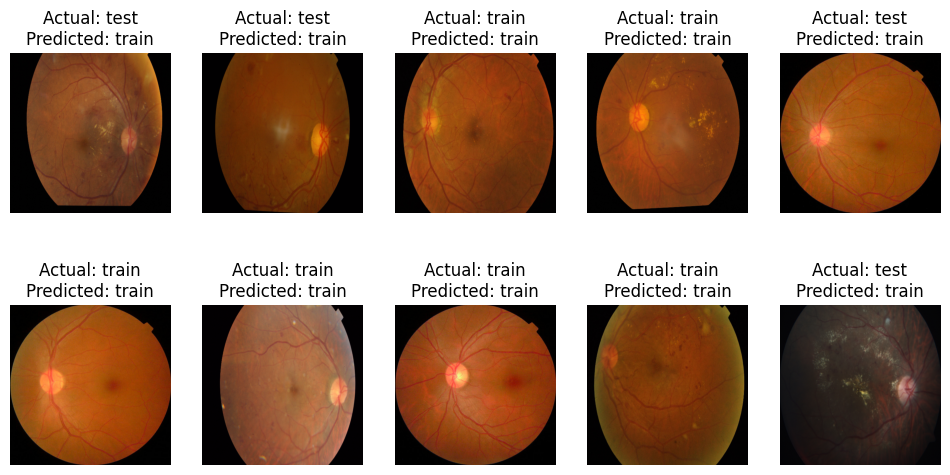

In [ ]:
# Display some examples of predictions and actual labels
plt.figure(figsize=(12, 6))

# Use take to create a new dataset with a specified number of batches
for i, (images, labels) in enumerate(ds_test.take(10)):  # Adjust the number of examples to display as needed
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Actual: {ds_test.class_names[labels[0]]}\nPredicted: {ds_test.class_names[predicted_labels[i]]}")
    plt.axis("off")

plt.show()


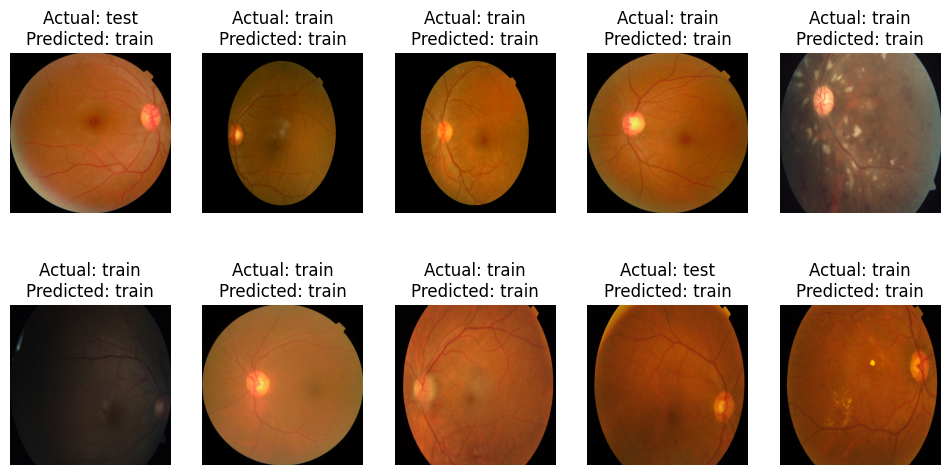

In [ ]:
# Display some examples of predictions and actual labels
plt.figure(figsize=(12, 6))

# Use take to create a new dataset with a specified number of batches
for i, (images, labels) in enumerate(ds_test.take(10)):  # Adjust the number of examples to display as needed
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Actual: {ds_test.class_names[labels[0]]}\nPredicted: {ds_test.class_names[predicted_labels[i]]}")
    plt.axis("off")

plt.show()


In [ ]:
# Assuming 'model' is your trained model

# Specify the path where you want to save the model
save_path = '/content/gdrive/MyDrive/Colab_Notebooks/saved_model'

# Save the model
model.save(save_path)

# Print a message to indicate that the model has been saved
print(f"Model saved to {save_path}")


Model saved to /content/gdrive/MyDrive/Colab_Notebooks/saved_model


In [ ]:
# Save only the model architecture and weights
model.save_weights('/content/gdrive/MyDrive/Colab_Notebooks/saved_model_weights')
model.save('/content/gdrive/MyDrive/Colab_Notebooks/saved_model_architecture')


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
image_path = '/content/gdrive/MyDrive/10359_right.jpeg'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image from the specified path
img_path = '/content/gdrive/MyDrive/10359_right.jpeg'
img = image.load_img(img_path, target_size=(512, 512))  # Resize to match the expected input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Normalize the pixel values to be in the range [0, 1]
img_array /= 255.0


In [ ]:
predictions = model.predict(img_array)


1/1 [==============================] - 0s 235ms/step


In [ ]:
predictions_single = model.predict(img_array)
predicted_label = np.argmax(predictions_single[0])
print(f"Predicted label: {predicted_label}")


1/1 [==============================] - 0s 158ms/step
Predicted label: 3
